<a href="https://colab.research.google.com/github/Qu1nnD/CS290/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Allow for two centroid initialization options: either specify the initial centroids or select them randomly from the dataset being used. Experiment with both options to see how the final centroids depend on the initialization.

When applying your algorithm, plot the data and the current centroids at each iteration. This provides a nice visualization of the algorithm in action.

With both the iris and penguins datasets, you actually have labels and therefore know the correct number of clusters, 𝑘. Experiment with different values of 𝑘 to see what happens, since the “correct” value isn’t actually known in practice.

In [2]:
penguins = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [79]:
def ini_Centroids(k, dataset, centroid_type):
  features = dataset[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g']].dropna() #
  if(centroid_type == "random"): # Makes the centroid random
      return features.sample(n=k).to_numpy() #
  elif(centroid_type == 'arthur'): #arthur vestile method/machinelearning pg 267 (bottom page) - 268 (top page)
  # take one centroid c1, chosen uniformly at random from the dataset, take a new centroid ci, choosing an instance xi with probability D(xi)^2/ sigma topsubscript-m bottomsubscript-j 1D(xj)^2, where D(xi) is the distance between the instance xi and the closest centroid that was already chosen. This probability distribution ensures that instace farther away from already chosen centroids are much more likely to be selected as centroids, repeat the previous step until all k centroids have been chosen
      return features.sample(n=k).to_numpy()
  else: # Makes the centroid farthest away from everything
      return features.sample(n=k).to_numpy()

In [ ]:
#def inertia():

In [ ]:
#def sil_coe():

In [ ]:
#def accuracy():

In [80]:
def K_Means(k, dataset, centroid_type, feature_x, feature_y):
    converged = False
    #
    # Streamline features variable in K_Means and ini_Centroids
    #
    features = dataset[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g']].dropna() #
    centroids=ini_Centroids(k, dataset, centroid_type) # initializes the first centroids
    while not converged: # Loops until there isn't massive changes between centroids and new_centroids
        #Calculations
        distances = np.linalg.norm(features.to_numpy()[:, np.newaxis] - centroids, axis=2) # calcuates the eudclidean distance between data points and centroids
        labels = np.argmin(distances, axis=1) # assigns data points to the closest centroid
        new_centroids = np.array([features[labels == i].mean(axis=0) for i in range(k)]) # calculates updated centroids given the mean of all data points from each cluster
        #Ploting
        plt.figure()
        plt.scatter(features[feature_x], features[feature_y], c=labels, marker='o') # Creates the circles that represent data points on the scatter plot
        plt.scatter(new_centroids[:, 2], new_centroids[:, 0], c='red',marker='X', s=200) # Creates the red X markers that show where the centroids are on the scatter plot
        plt.title(f'Current Centroids for k={k}') # Creates the title of the scatter plot
        plt.xlabel(feature_x) # Creates the x axis label for the scatter plot
        plt.ylabel(feature_y) # Creates the y axis label for the scatter plot
        plt.show() # Prints the scatter plot
        #Convergence test and updating centroids
        converged = np.all(centroids == new_centroids) # Tests to see if there is major differences between the current and new centroids to see if it needs to continue the loop again
        centroids = new_centroids
    return labels, centroids

Running K-Means with k=3


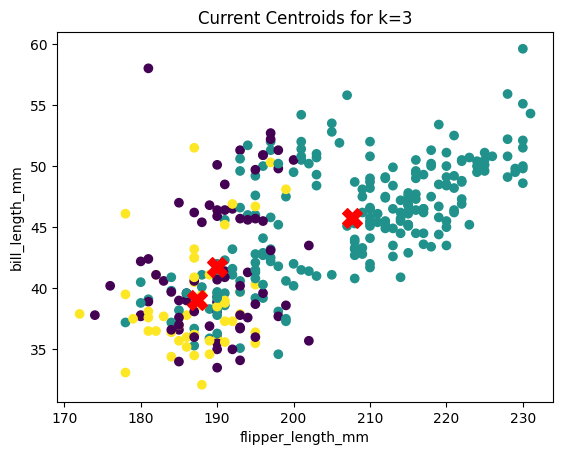

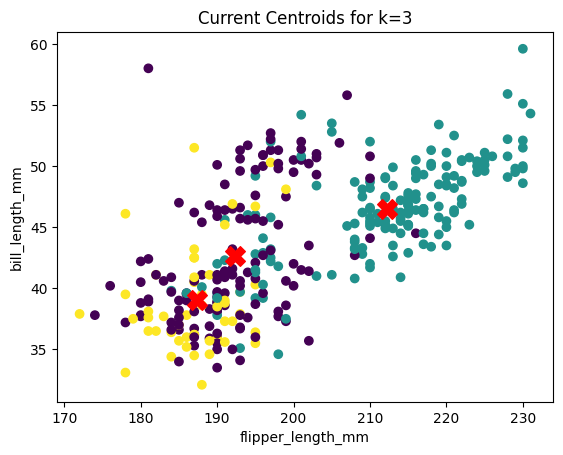

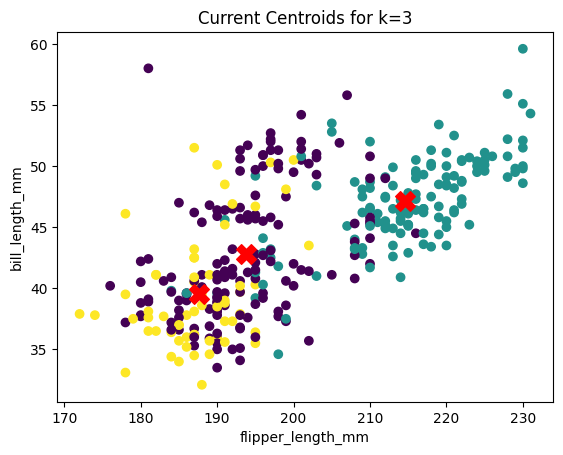

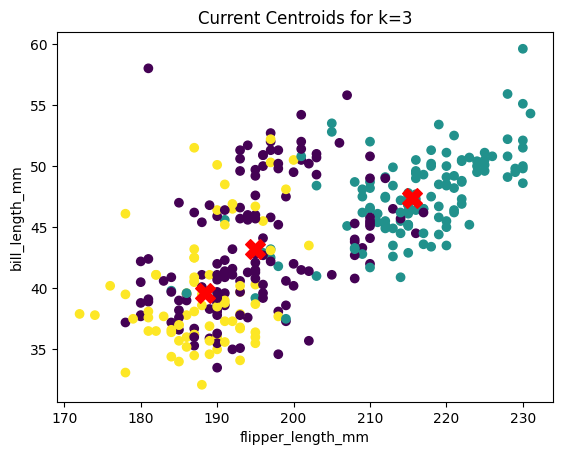

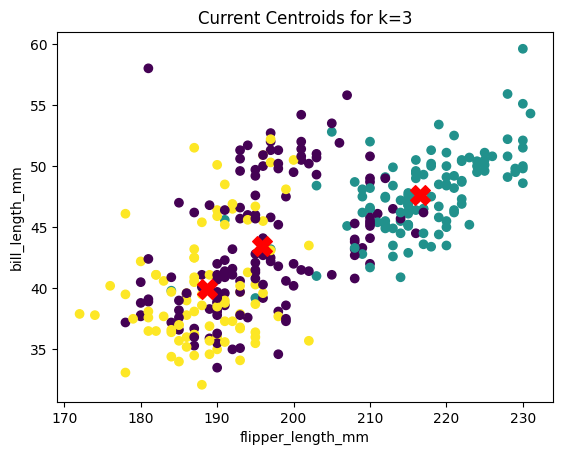

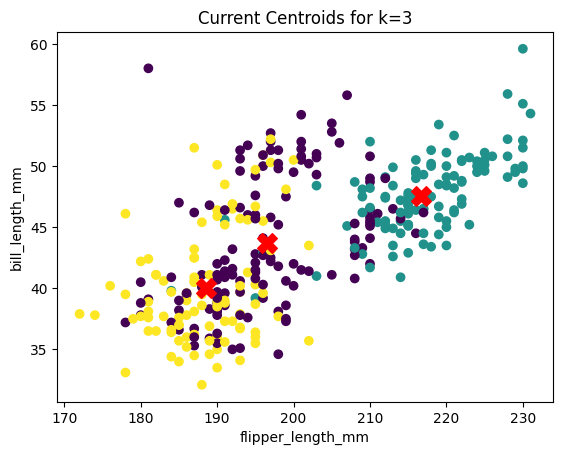

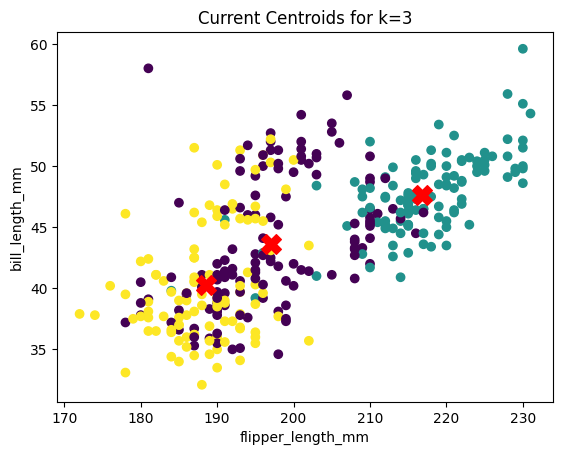

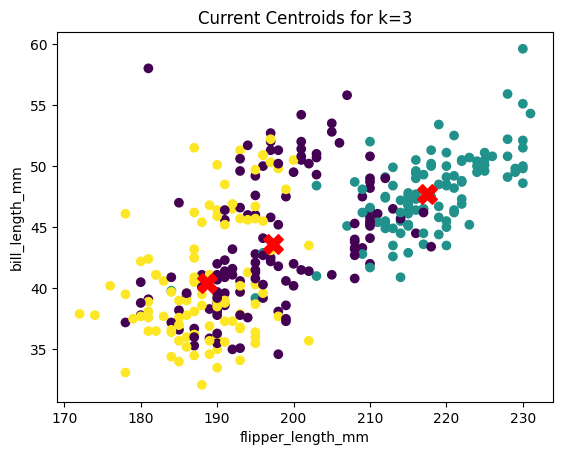

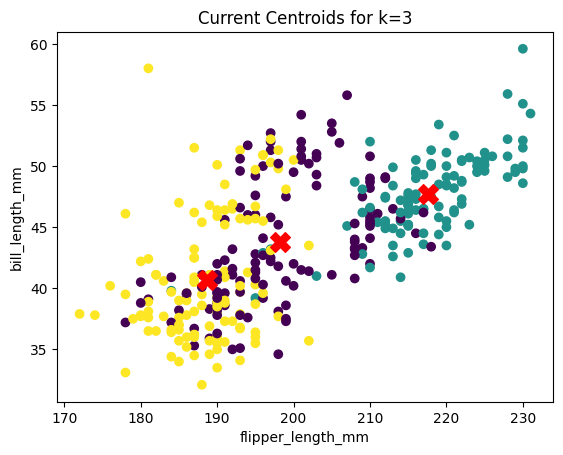

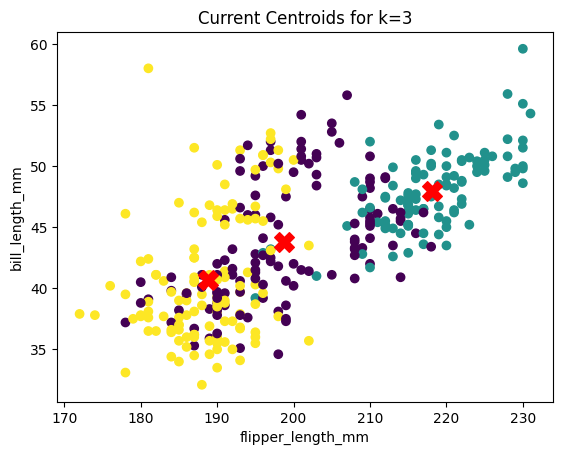

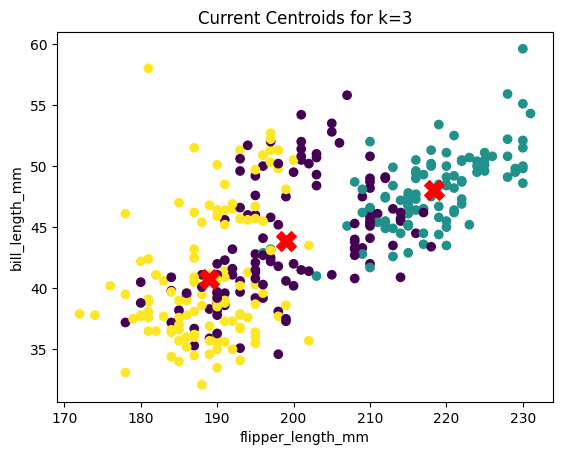

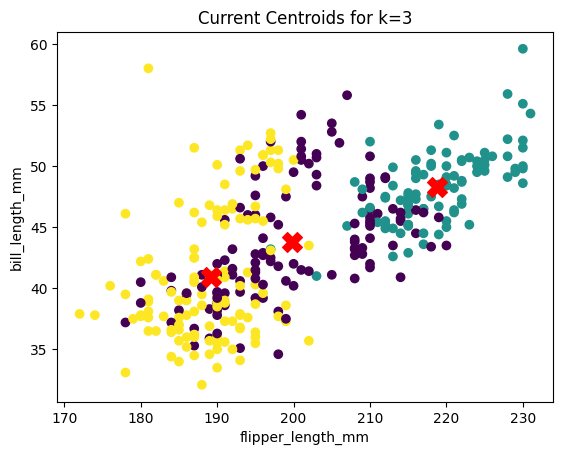

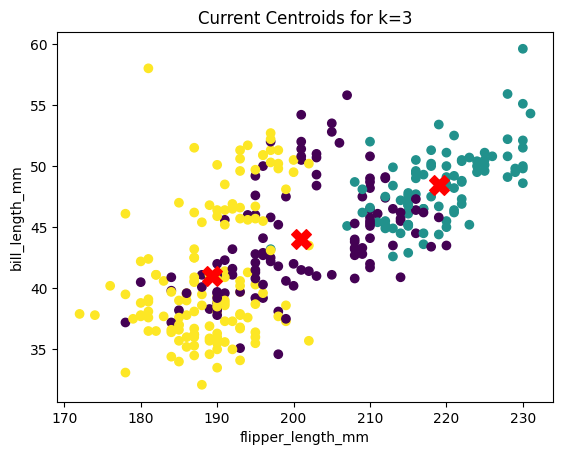

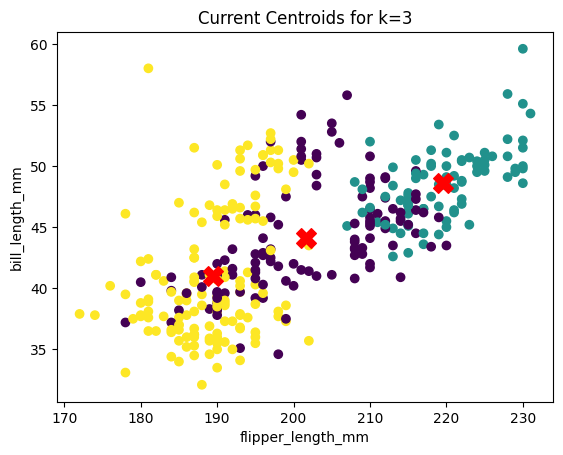

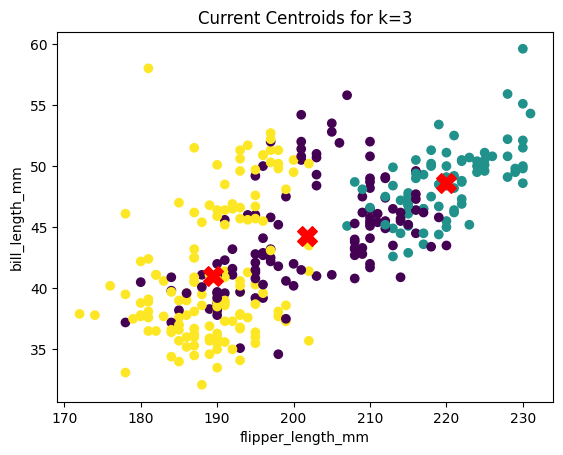

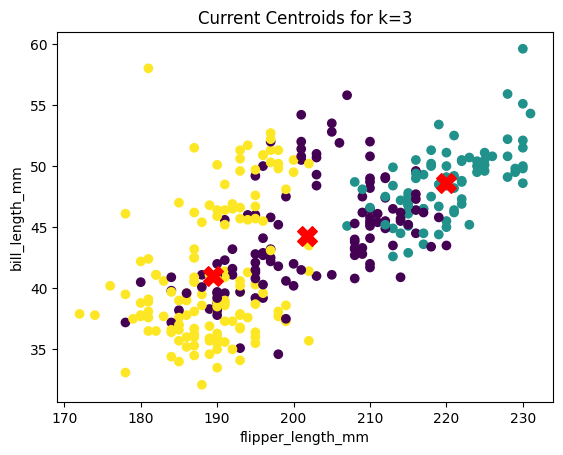

In [81]:
for k in range(3,4):
  print(f"Running K-Means with k={k}")
  clusters = K_Means(k, penguins, "random", 'flipper_length_mm', 'bill_length_mm')